
# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

>● The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.

>● The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

There's some questions we want an answers for them:

1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### *1. importing Libraries and loading data*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df_c = pd.read_csv('U.S. Census Data.csv')
df_g = pd.read_excel (r'gun_data.xlsx')

### *2. Data Assessing*
> ####  2.1 Assessing for U.S. Census Data

In [3]:
df_c.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [5]:
df_c.shape

(85, 52)

In [6]:
df_c.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"High school graduate or higher, percent of per...",(c),"50,645.33",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.103,0.048,50.40%,2.50%,1.90%,"165,788,897","$17,243",1.50%,"40,507",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [7]:
df_c.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [8]:
type(df_c['Fact'][0])


str

In [9]:
df_c['Fact Note'].value_counts()

(c)                                                                                                                                                                                                                                            6
(a)                                                                                                                                                                                                                                            5
Includes data not distributed by county.                                                                                                                                                                                                       5
Footnote on this item in place of data                                                                                                                                                                                                         1
Not available                       

In [10]:
df_c2016=df_c[df_c['Fact'].notnull()]
df_c2016[df_c2016['Fact'].str.contains('2016')]['Fact'].value_counts()

Female persons, percent,  July 1, 2016,  (V2016)                                         1
Hispanic or Latino, percent, July 1, 2016,  (V2016)                                      1
Building permits, 2016                                                                   1
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    1
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   1
Asian alone, percent, July 1, 2016,  (V2016)                                             1
Black or African American alone, percent, July 1, 2016,  (V2016)                         1
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  1
Two or More Races, percent, July 1, 2016,  (V2016)                                       1
White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)                     1
White alone, percent, July 1, 2016,  (V2016)                                             1

> ####  2.1 Assessing for df_g

In [11]:
df_g.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [12]:
df_g.shape

(12485, 27)

In [13]:
df_g.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [14]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [15]:
df_g.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [16]:
type(df_g['month'][0])

str

In [17]:
df_g[df_g['month'].str.contains('2016')]['month'].value_counts()

2016-06    55
2016-02    55
2016-12    55
2016-07    55
2016-05    55
2016-04    55
2016-10    55
2016-03    55
2016-09    55
2016-01    55
2016-08    55
2016-11    55
Name: month, dtype: int64

In [18]:
df_g2=df_g[df_g['month'].str.contains('2016')]
df_g2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,2016-12,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,2016-12,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,2016-12,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,2016-12,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,2016-12,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-01,Virginia,524.0,NaN,27033.0,15699.0,922.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,44181
1151,2016-01,Washington,19688.0,NaN,20427.0,11355.0,2147.0,595,4.0,10.0,...,9.0,NaN,NaN,555.0,458.0,29.0,5.0,11.0,0.0,58050
1152,2016-01,West Virginia,3378.0,NaN,7419.0,5505.0,321.0,349,3.0,5.0,...,0.0,NaN,NaN,5.0,7.0,2.0,0.0,0.0,0.0,18985
1153,2016-01,Wisconsin,9496.0,NaN,17969.0,10756.0,937.0,42,0.0,0.0,...,1.0,NaN,NaN,6.0,5.0,0.0,0.0,1.0,0.0,39561


In [19]:
df_g2.shape

(660, 27)

In [20]:
df_g2['state'].value_counts()

Mariana Islands         12
New York                12
Florida                 12
Georgia                 12
District of Columbia    12
South Dakota            12
North Dakota            12
Alabama                 12
Mississippi             12
California              12
West Virginia           12
Missouri                12
Kentucky                12
Tennessee               12
Massachusetts           12
Maryland                12
Alaska                  12
Arizona                 12
Ohio                    12
Nevada                  12
Texas                   12
Washington              12
Pennsylvania            12
Colorado                12
Maine                   12
Michigan                12
Nebraska                12
Louisiana               12
Virginia                12
Hawaii                  12
Utah                    12
Arkansas                12
Wyoming                 12
Wisconsin               12
Montana                 12
Virgin Islands          12
Illinois                12
S

In [21]:
df_g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 495 to 1154
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      660 non-null    object 
 1   state                      660 non-null    object 
 2   permit                     660 non-null    float64
 3   permit_recheck             605 non-null    float64
 4   handgun                    660 non-null    float64
 5   long_gun                   660 non-null    float64
 6   other                      660 non-null    float64
 7   multiple                   660 non-null    int64  
 8   admin                      660 non-null    float64
 9   prepawn_handgun            660 non-null    float64
 10  prepawn_long_gun           660 non-null    float64
 11  prepawn_other              660 non-null    float64
 12  redemption_handgun         660 non-null    float64
 13  redemption_long_gun        660 non-null    floa

In [22]:
df_g2.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')


### Data Cleaning 
1. We will scoope our results on year 2016, Because most variables in The U.S. census data just have one data point per state (2016)
2. Then we will drop rows containing NaNs.
3. 'Fact' column contain blanck info not for any state, we want to drop these columns too.
4. Some indext in some states contain non presentage values we will change them to %.
5. Then we need to merge the two files together in one file.

#### extracting only 2016 from dataset

In [23]:
df_c2=df_c2016[df_c2016['Fact'].str.contains('2016')]
df_c2.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


### Checking columns contain persentages

In [24]:
not_percentage_state=[]
for i in df_c2.columns:
    if df_c2[i].str.contains('%').any()==False:
        not_percentage_state.append(i)
not_percentage_state

['Fact',
 'Fact Note',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee']

#### As we see first two columns appears but I don't need them in my cleaning, so...

In [25]:
df_c3 = df_c2.iloc[2:-2,2:]
df_c3.head(2)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### removing persentages marks from all table and Multiple by 100 to columbs which not in persent to get persentage value

In [26]:
not_percentage_state=[]
for i in df_c3.columns:
    if df_c3[i].str.contains('%').any()==False:
        not_percentage_state.append(i)
not_percentage_state

['New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee']

In [27]:
df_c3 = df_c3[not_percentage_state].astype(float)

In [28]:
df_c3 = df_c3*100

In [29]:
df_c3

,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee
2,1.1,1.9,6.4,12.7,0.7,4.6,6.8,0.6,0.3,7.3,6.3,4.8
4,6.2,5.9,6.0,7.3,6.0,6.8,5.8,5.6,5.2,5.9,7.1,6.1
6,23.6,21.2,22.7,23.3,22.5,24.5,21.2,20.9,19.7,22.1,24.6,22.6
8,16.5,15.4,15.5,14.5,16.2,15.0,16.8,17.4,16.5,16.7,16.0,15.7
10,50.5,51.4,51.4,48.7,51.0,50.5,50.5,51.0,51.4,51.5,49.6,51.2
12,82.6,69.9,71.0,87.9,82.5,74.6,87.4,82.4,84.4,68.5,85.2,78.7
13,2.5,17.7,22.2,2.9,12.8,7.8,2.1,11.8,8.1,27.5,2.0,17.1
14,10.6,1.0,1.6,5.5,0.3,9.2,1.8,0.4,1.0,0.5,9.0,0.4
15,1.7,8.9,2.9,1.5,2.2,2.2,4.5,3.5,3.6,1.6,1.5,1.8
16,0.2,0.1,0.1,0.1,0.1,0.2,0.4,0.1,0.2,0.1,0.1,0.1


In [30]:
df_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   New Mexico      13 non-null     float64
 1   New York        13 non-null     float64
 2   North Carolina  13 non-null     float64
 3   North Dakota    13 non-null     float64
 4   Ohio            13 non-null     float64
 5   Oklahoma        13 non-null     float64
 6   Oregon          13 non-null     float64
 7   Pennsylvania    13 non-null     float64
 8   Rhode Island    13 non-null     float64
 9   South Carolina  13 non-null     float64
 10  South Dakota    13 non-null     float64
 11  Tennessee       13 non-null     float64
dtypes: float64(12)
memory usage: 1.3 KB


In [31]:
df_c0 = df_c2.copy()
df_c0.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%


In [32]:
df_c0.update(df_c3)
df_c0.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,6.3,4.8,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


### After we make all of values in persentage we will remove presentage mark

In [33]:
df_c4=df_c0.astype(str)
df_c4.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",nan,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",nan,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [34]:
df_c4 = df_c4.iloc[2:-2,2:]
df_c4.head(2)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,6.3,4.8,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,7.1,6.1,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [35]:
for i in df_c4.columns:
    df_c4[i]=df_c4[i].str.replace('%','').str.extract(r'(\d+.\d+)').astype(float)

In [36]:
df_c4.head(5)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,6.4,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,20.1,24.4,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7
8,16.1,10.4,16.9,16.3,13.6,13.4,16.1,17.5,19.9,13.1,...,16.0,15.7,12.0,10.5,18.1,14.6,14.8,18.8,16.1,15.0
10,51.6,47.7,50.3,50.9,50.3,49.7,51.2,51.6,51.1,51.3,...,49.6,51.2,50.4,49.7,50.6,50.8,50.0,50.5,50.3,48.9


In [37]:
df_c0.update(df_c4)
df_c0.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7


In [38]:
df_c0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 29
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            17 non-null     object
 1   Fact Note       6 non-null      object
 2   Alabama         17 non-null     object
 3   Alaska          17 non-null     object
 4   Arizona         17 non-null     object
 5   Arkansas        17 non-null     object
 6   California      17 non-null     object
 7   Colorado        17 non-null     object
 8   Connecticut     17 non-null     object
 9   Delaware        17 non-null     object
 10  Florida         17 non-null     object
 11  Georgia         17 non-null     object
 12  Hawaii          17 non-null     object
 13  Idaho           17 non-null     object
 14  Illinois        17 non-null     object
 15  Indiana         17 non-null     object
 16  Iowa            17 non-null     object
 17  Kansas          17 non-null     object
 18  Kentucky    

### Now we will replace commans in Fact with underscores and transpose the matrix and fix appearance

In [39]:
mask=df_c0.copy()
mask.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7


In [40]:
for i in mask.columns:
    mask[i]=mask[i].astype(str)

In [41]:
for count,value in df_c0.iterrows():
    for i in mask.columns:
        if mask[i].str.contains(',').any():
            mask[i]=mask[i].str.replace(',','')

In [42]:
mask.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),nan,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),nan,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,nan,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,...,6.3,4.8,10.8,10.4,0.2,5.1,8.4,1.2,1.6,3.9
4,Persons under 5 years percent July 1 2016 (V2...,nan,6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
6,Persons under 18 years percent July 1 2016 (V...,nan,22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,...,24.6,22.6,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7


In [43]:
df_c4=mask.copy()

In [44]:
df_c4.drop(columns='Fact Note',inplace=True)

In [45]:
df_c4=df_c4.transpose()
df_c4.head(3)

,0,1,2,4,6,8,10,12,13,14,15,16,17,18,19,22,29
Fact,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (esti...,Persons under 5 years percent July 1 2016 (V2...,Persons under 18 years percent July 1 2016 (V...,Persons 65 years and over percent July 1 2016...,Female persons percent July 1 2016 (V2016),White alone percent July 1 2016 (V2016),Black or African American alone percent July 1...,American Indian and Alaska Native alone percen...,Asian alone percent July 1 2016 (V2016),Native Hawaiian and Other Pacific Islander alo...,Two or More Races percent July 1 2016 (V2016),Hispanic or Latino percent July 1 2016 (V2016),White alone not Hispanic or Latino percent Jul...,Housing units July 1 2016 (V2016),Building permits 2016
Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503


In [46]:
df_c_=df_c4.copy().astype(str)
df_c_.head()

,0,1,2,4,6,8,10,12,13,14,15,16,17,18,19,22,29
Fact,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (esti...,Persons under 5 years percent July 1 2016 (V2...,Persons under 18 years percent July 1 2016 (V...,Persons 65 years and over percent July 1 2016...,Female persons percent July 1 2016 (V2016),White alone percent July 1 2016 (V2016),Black or African American alone percent July 1...,American Indian and Alaska Native alone percen...,Asian alone percent July 1 2016 (V2016),Native Hawaiian and Other Pacific Islander alo...,Two or More Races percent July 1 2016 (V2016),Hispanic or Latino percent July 1 2016 (V2016),White alone not Hispanic or Latino percent Jul...,Housing units July 1 2016 (V2016),Building permits 2016
Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
Arizona,6931071,6392301,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578
Arkansas,2988248,2916025,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474


### Here we will make Fact is the header, transpose it to drop from our dataset and bring it back again 

In [47]:
df_c_.columns=df_c_.iloc[0]
df_c_=df_c_.transpose()
df_c_.drop(columns='Fact',inplace=True)
df_c_=df_c_.transpose()
df_c_.head(5)

Fact,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (estimates base) to July 1 2016 (V2016),Persons under 5 years percent July 1 2016 (V2016),Persons under 18 years percent July 1 2016 (V2016),Persons 65 years and over percent July 1 2016 (V2016),Female persons percent July 1 2016 (V2016),White alone percent July 1 2016 (V2016),Black or African American alone percent July 1 2016 (V2016),American Indian and Alaska Native alone percent July 1 2016 (V2016),Asian alone percent July 1 2016 (V2016),Native Hawaiian and Other Pacific Islander alone percent July 1 2016 (V2016),Two or More Races percent July 1 2016 (V2016),Hispanic or Latino percent July 1 2016 (V2016),White alone not Hispanic or Latino percent July 1 2016 (V2016),Housing units July 1 2016 (V2016),Building permits 2016
Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
Arizona,6931071,6392301,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578
Arkansas,2988248,2916025,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474
California,39250017,37254522,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525,102350


### Now We will clean our header for better visual

In [48]:
test=[]
x=df_c_.columns
for i in x:
    i=str(i)
    i=i.replace(' ','_').strip()
    i=i.replace('_July_1_2016__(V2016)','').strip()
    i=i.replace('(estimates_base)_to','').strip()
    i=i.replace('_April_1_2010__(V2016)','').strip()
    i=i.replace('_-_April_1_2010_','').strip()
    i=i.replace('percent','%').strip()
    i=i.replace('_2016','').strip()
    test.append(i)
test

['Population_estimates',
 'Population_estimates_base',
 'Population_%_change',
 'Persons_under_5_years_%',
 'Persons_under_18_years_%',
 'Persons_65_years_and_over_%_',
 'Female_persons_%_',
 'White_alone_%',
 'Black_or_African_American_alone_%',
 'American_Indian_and_Alaska_Native_alone_%',
 'Asian_alone_%',
 'Native_Hawaiian_and_Other_Pacific_Islander_alone_%',
 'Two_or_More_Races_%',
 'Hispanic_or_Latino_%',
 'White_alone_not_Hispanic_or_Latino_%',
 'Housing_units_',
 'Building_permits']

In [49]:
df_c_.columns=test
df_c_.head(2)

,Population_estimates,Population_estimates_base,Population_%_change,Persons_under_5_years_%,Persons_under_18_years_%,Persons_65_years_and_over_%_,Female_persons_%_,White_alone_%,Black_or_African_American_alone_%,American_Indian_and_Alaska_Native_alone_%,Asian_alone_%,Native_Hawaiian_and_Other_Pacific_Islander_alone_%,Two_or_More_Races_%,Hispanic_or_Latino_%,White_alone_not_Hispanic_or_Latino_%,Housing_units_,Building_permits
Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503


In [50]:
df_c_=df_c_.reset_index()
test1=list(df_c_.columns)
test1.remove('index')
test1.insert(0,'state')
test1

['state',
 'Population_estimates',
 'Population_estimates_base',
 'Population_%_change',
 'Persons_under_5_years_%',
 'Persons_under_18_years_%',
 'Persons_65_years_and_over_%_',
 'Female_persons_%_',
 'White_alone_%',
 'Black_or_African_American_alone_%',
 'American_Indian_and_Alaska_Native_alone_%',
 'Asian_alone_%',
 'Native_Hawaiian_and_Other_Pacific_Islander_alone_%',
 'Two_or_More_Races_%',
 'Hispanic_or_Latino_%',
 'White_alone_not_Hispanic_or_Latino_%',
 'Housing_units_',
 'Building_permits']

In [51]:
df_c_.columns=test1

In [52]:
df_c_.head(3)

,state,Population_estimates,Population_estimates_base,Population_%_change,Persons_under_5_years_%,Persons_under_18_years_%,Persons_65_years_and_over_%_,Female_persons_%_,White_alone_%,Black_or_African_American_alone_%,American_Indian_and_Alaska_Native_alone_%,Asian_alone_%,Native_Hawaiian_and_Other_Pacific_Islander_alone_%,Two_or_More_Races_%,Hispanic_or_Latino_%,White_alone_not_Hispanic_or_Latino_%,Housing_units_,Building_permits
0,Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
1,Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
2,Arizona,6931071,6392301,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578


In [53]:
df_c_.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [54]:
df_c_.head()

,state,population_estimates,population_estimates_base,population_%_change,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%_,female_persons_%_,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,asian_alone_%,native_hawaiian_and_other_pacific_islander_alone_%,two_or_more_races_%,hispanic_or_latino_%,white_alone_not_hispanic_or_latino_%,housing_units_,building_permits
0,Alabama,4863300,4780131,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,2230185,15001
1,Alaska,741894,710249,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,310658,1503
2,Arizona,6931071,6392301,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,2961003,35578
3,Arkansas,2988248,2916025,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,1354762,9474
4,California,39250017,37254522,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,14060525,102350


## *Now we will clean Gun Data*
> #### And as we see census data is limited in July 2016 so we will extract this month only from gun data

In [55]:
df_g2016=df_g[df_g['month'].notnull()]
df_g2016[df_g2016['month'].str.contains('2016')]['month'].value_counts()

2016-06    55
2016-02    55
2016-12    55
2016-07    55
2016-05    55
2016-04    55
2016-10    55
2016-03    55
2016-09    55
2016-01    55
2016-08    55
2016-11    55
Name: month, dtype: int64

In [56]:
df_g2=df_g2016[df_g2016['month'].str.contains('2016-07')]

In [57]:
df_g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 770 to 824
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      55 non-null     object 
 1   state                      55 non-null     object 
 2   permit                     55 non-null     float64
 3   permit_recheck             55 non-null     float64
 4   handgun                    55 non-null     float64
 5   long_gun                   55 non-null     float64
 6   other                      55 non-null     float64
 7   multiple                   55 non-null     int64  
 8   admin                      55 non-null     float64
 9   prepawn_handgun            55 non-null     float64
 10  prepawn_long_gun           55 non-null     float64
 11  prepawn_other              55 non-null     float64
 12  redemption_handgun         55 non-null     float64
 13  redemption_long_gun        55 non-null     float6

In [58]:
df_g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 770 to 824
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      55 non-null     object 
 1   state                      55 non-null     object 
 2   permit                     55 non-null     float64
 3   permit_recheck             55 non-null     float64
 4   handgun                    55 non-null     float64
 5   long_gun                   55 non-null     float64
 6   other                      55 non-null     float64
 7   multiple                   55 non-null     int64  
 8   admin                      55 non-null     float64
 9   prepawn_handgun            55 non-null     float64
 10  prepawn_long_gun           55 non-null     float64
 11  prepawn_other              55 non-null     float64
 12  redemption_handgun         55 non-null     float64
 13  redemption_long_gun        55 non-null     float6

In [59]:
df_g3 = df_g2.copy()

In [60]:
df_g3.drop(columns='month',inplace=True)

### We will match between two state colums in two datasets

In [61]:
df_g3.state=df_g3.state.str.lower()
df_g3.state=df_g3.state.str.replace(' ','_')

In [62]:
df_g3.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
770,alabama,27765.0,0.0,10132.0,7392.0,538.0,465,0.0,5.0,3.0,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
771,alaska,215.0,0.0,2898.0,2816.0,239.0,165,0.0,7.0,10.0,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
772,arizona,7863.0,308.0,13693.0,8643.0,1283.0,642,0.0,5.0,10.0,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
773,arkansas,4116.0,677.0,6323.0,5053.0,325.0,367,2.0,6.0,14.0,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
774,california,77962.0,0.0,46361.0,47594.0,17297.0,0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218


> ### Now We wil merge the two datasets

In [63]:
df_c_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   state                                               50 non-null     object
 1   population_estimates                                50 non-null     object
 2   population_estimates_base                           50 non-null     object
 3   population_%_change                                 50 non-null     object
 4   persons_under_5_years_%                             50 non-null     object
 5   persons_under_18_years_%                            50 non-null     object
 6   persons_65_years_and_over_%_                        50 non-null     object
 7   female_persons_%_                                   50 non-null     object
 8   white_alone_%                                       50 non-null     object
 9   black_or_afr

In [64]:
df_c_['native_hawaiian_and_other_pacific_islander_alone_%']=df_c_['native_hawaiian_and_other_pacific_islander_alone_%'].str.replace('Z','0')


In [65]:
for i in df_c_.iloc[:,1:].columns:
    df_c_[i]=df_c_[i].astype(float)

In [66]:
df_last = df_g2.copy()

In [67]:
df_last=pd.merge(df_c_,df_g2,how='inner',on='state')

In [68]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   state                                               50 non-null     object 
 1   population_estimates                                50 non-null     float64
 2   population_estimates_base                           50 non-null     float64
 3   population_%_change                                 50 non-null     float64
 4   persons_under_5_years_%                             50 non-null     float64
 5   persons_under_18_years_%                            50 non-null     float64
 6   persons_65_years_and_over_%_                        50 non-null     float64
 7   female_persons_%_                                   50 non-null     float64
 8   white_alone_%                                       50 non-null     float64
 9   b

In [69]:
df_last.to_csv('df_last.csv',index=False)

In [70]:
df_last.columns

Index(['state', 'population_estimates', 'population_estimates_base',
       'population_%_change', 'persons_under_5_years_%',
       'persons_under_18_years_%', 'persons_65_years_and_over_%_',
       'female_persons_%_', 'white_alone_%',
       'black_or_african_american_alone_%',
       'american_indian_and_alaska_native_alone_%', 'asian_alone_%',
       'native_hawaiian_and_other_pacific_islander_alone_%',
       'two_or_more_races_%', 'hispanic_or_latino_%',
       'white_alone_not_hispanic_or_latino_%', 'housing_units_',
       'building_permits', 'month', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_ha

<a id='eda'></a>
## Exploratory Data Analysis




array([[<AxesSubplot:title={'center':'population_estimates'}>,
        <AxesSubplot:title={'center':'population_estimates_base'}>,
        <AxesSubplot:title={'center':'population_%_change'}>,
        <AxesSubplot:title={'center':'persons_under_5_years_%'}>,
        <AxesSubplot:title={'center':'persons_under_18_years_%'}>,
        <AxesSubplot:title={'center':'persons_65_years_and_over_%_'}>],
       [<AxesSubplot:title={'center':'female_persons_%_'}>,
        <AxesSubplot:title={'center':'white_alone_%'}>,
        <AxesSubplot:title={'center':'black_or_african_american_alone_%'}>,
        <AxesSubplot:title={'center':'american_indian_and_alaska_native_alone_%'}>,
        <AxesSubplot:title={'center':'asian_alone_%'}>,
        <AxesSubplot:title={'center':'native_hawaiian_and_other_pacific_islander_alone_%'}>],
       [<AxesSubplot:title={'center':'two_or_more_races_%'}>,
        <AxesSubplot:title={'center':'hispanic_or_latino_%'}>,
        <AxesSubplot:title={'center':'white_alone_n

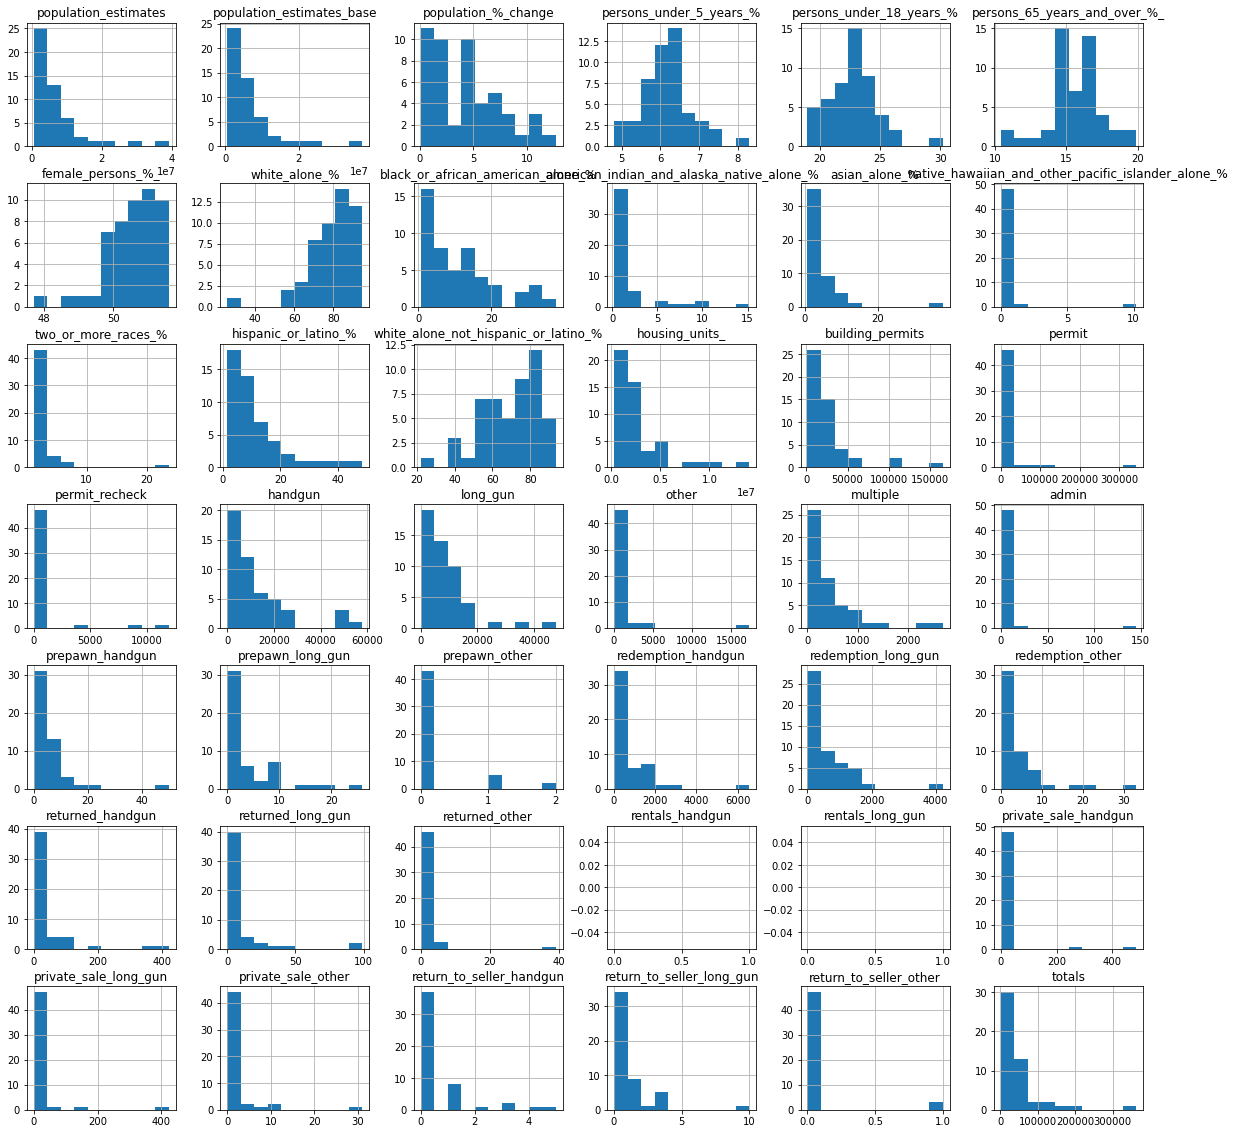

In [71]:
df_last.hist(figsize=(20,20))

In [72]:
df_last.head(5)

,state,population_estimates,population_estimates_base,population_%_change,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%_,female_persons_%_,white_alone_%,black_or_african_american_alone_%,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,4863300.0,4780131.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,...,0.0,NaN,NaN,9.0,5.0,0.0,1.0,1.0,0.0,48927
1,Alaska,741894.0,710249.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,...,0.0,NaN,NaN,7.0,17.0,0.0,1.0,0.0,0.0,6793
2,Arizona,6931071.0,6392301.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,...,0.0,NaN,NaN,13.0,9.0,0.0,0.0,1.0,0.0,34496
3,Arkansas,2988248.0,2916025.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,...,0.0,NaN,NaN,7.0,5.0,1.0,0.0,1.0,0.0,19378
4,California,39250017.0,37254522.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,190218


>### Research Question 1 (What census data is most associated with high gun per capita?)

In [110]:
df_check = df_last.copy()
dtf = pd.DataFrame()

In [111]:
dtf['permit_per_state_%']=(df_check['permit']/df_check['totals'])*100
dtf['state']=df_check['state']

### This bar chart shows the top 5 states in terms of legal registration of guns

Text(0.5, 0, 'State')

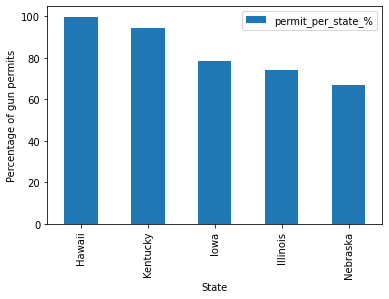

In [115]:
dtf.set_index(dtf['state']).sort_values(by='permit_per_state_%',ascending=False).head().plot(kind='bar')
plt.ylabel('Percentage of gun permits')
plt.xlabel('State')

### The following graph is showing the persentage of guns in each state per citizin and the persentage of legal guns

In [120]:
dtf['gun_per_state_%'] = df_check['totals']/df_check['population_estimates']*100
df_check['gun_per_state_%']= dtf['gun_per_state_%']

Text(0.5, 0, 'State')

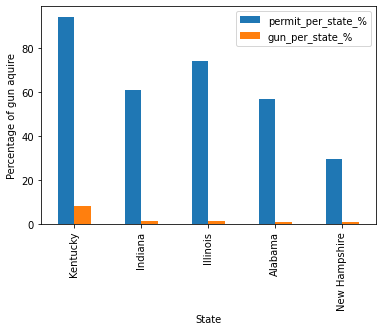

In [117]:
dtf.set_index(dtf['state']).sort_values(by='gun_per_state_%',ascending=False).head().plot(kind='bar')
plt.ylabel('Percentage of gun aquire')
plt.xlabel('State')

## And the following table and graph showing the highest number of guns in each state

In [121]:
df_check[['state','population_estimates','totals','gun_per_state_%']].sort_values(by='totals',ascending=False).head()

,state,population_estimates,totals,gun_per_state_%
16,Kentucky,4436974.0,363085,8.183167
4,California,39250017.0,190218,0.484632
12,Illinois,12801539.0,168227,1.314115
42,Texas,27862596.0,127207,0.456551
8,Florida,20612439.0,125208,0.607439


In [124]:
dtf['totals']=df_check['totals']

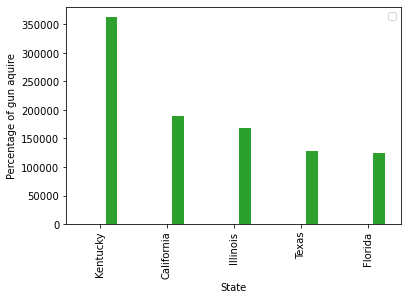

In [127]:
dtf.set_index(dtf['state']).sort_values(by='totals',ascending=False).head().plot(kind='bar')
plt.ylabel('Percentage of gun aquire')
plt.xlabel('State')
plt.legend('')

>### Research Question 2 (What is the overall trend of gun purchases?)


In [76]:
df_check[['state','totals','handgun']].sort_values(by='handgun',ascending=False).head()

,state,totals,handgun
8,Florida,125208,57902.0
42,Texas,127207,50499.0
37,Pennsylvania,86137,46843.0
4,California,190218,46361.0
34,Ohio,63148,27876.0


In [77]:
df_check[['state','totals','long_gun']].sort_values(by='long_gun',ascending=False).head()

,state,totals,long_gun
4,California,190218,47594.0
42,Texas,127207,34266.0
8,Florida,125208,28000.0
34,Ohio,63148,17720.0
45,Virginia,43574,16731.0


In [78]:
df_check[['state','totals','other']].sort_values(by='other',ascending=False).head()

,state,totals,other
4,California,190218,17297.0
8,Florida,125208,4504.0
42,Texas,127207,4046.0
34,Ohio,63148,2166.0
46,Washington,47887,2118.0


### This pie chart shows the overall trend of gun purchases in all states 

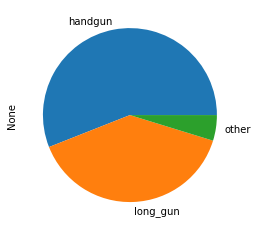

In [79]:
df_check[['handgun','long_gun','other']].mean().plot(kind='pie');

> ### Research Question 3 (Which states have had the highest growth in gun registrations?)


In [80]:
df_check['permit_per_state_%'] = df_check['permit']/df_check['totals']*100

In [95]:
df_check[['state','totals','permit','permit_per_state_%']].sort_values(by='permit_per_state_%',ascending=False).head()

,state,totals,permit,permit_per_state_%
10,Hawaii,1565,1563.0,99.872204
16,Kentucky,363085,342858.0,94.429128
14,Iowa,11937,9391.0,78.671358
12,Illinois,168227,125075.0,74.348945
26,Nebraska,5429,3629.0,66.844723


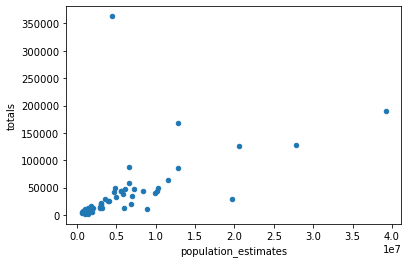

In [109]:

df_check.plot(x='population_estimates', y='totals', kind='scatter');


> ### Research Question 4 (?)


In [82]:
df_check[['state','totals','population_estimates']].sort_values(by='totals',ascending=False).head()

,state,totals,population_estimates
16,Kentucky,363085,4436974.0
4,California,190218,39250017.0
12,Illinois,168227,12801539.0
42,Texas,127207,27862596.0
8,Florida,125208,20612439.0


In [83]:
df_check.corr()

,population_estimates,population_estimates_base,population_%_change,persons_under_5_years_%,persons_under_18_years_%,persons_65_years_and_over_%_,female_persons_%_,white_alone_%,black_or_african_american_alone_%,american_indian_and_alaska_native_alone_%,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,gun_per_state_%,permit_per_state_%
population_estimates,1.000000,0.999079,0.148170,-0.000040,0.028916,-0.185680,0.224346,-0.171441,0.208184,-0.216563,...,NaN,0.182985,0.139746,0.114612,0.262880,0.015092,0.144691,0.528661,-0.077510,0.069583
population_estimates_base,0.999079,1.000000,0.118658,-0.011667,0.018806,-0.180228,0.235018,-0.173354,0.212981,-0.222257,...,NaN,0.183648,0.137290,0.114082,0.260120,0.016690,0.150884,0.530784,-0.075213,0.074746
population_%_change,0.148170,0.118658,1.000000,0.539141,0.422324,-0.359485,-0.399213,-0.050943,-0.100684,0.187701,...,NaN,0.130137,0.162983,0.109253,0.108146,0.030960,0.022385,-0.018912,-0.107762,-0.000484
persons_under_5_years_%,-0.000040,-0.011667,0.539141,1.000000,0.933638,-0.728141,-0.554454,-0.107755,-0.077207,0.414860,...,NaN,-0.022185,0.007791,-0.069575,0.152548,-0.104531,0.028307,0.002898,0.023493,0.152179
persons_under_18_years_%,0.028916,0.018806,0.422324,0.933638,1.000000,-0.765433,-0.406481,-0.027480,-0.001007,0.314803,...,NaN,-0.078550,-0.041598,-0.112872,0.114785,-0.108771,-0.036575,0.038177,0.032596,0.161749
persons_65_years_and_over_%_,-0.185680,-0.180228,-0.359485,-0.728141,-0.765433,1.000000,0.391080,0.170049,-0.089051,-0.264859,...,NaN,-0.047177,-0.088958,-0.034191,-0.221229,0.045621,-0.104384,-0.099199,-0.012554,-0.074475
female_persons_%_,0.224346,0.235018,-0.399213,-0.554454,-0.406481,0.391080,1.000000,-0.221465,0.671899,-0.615896,...,NaN,0.025420,-0.037179,0.069684,0.032637,-0.006268,0.085791,0.143042,-0.027132,0.017354
white_alone_%,-0.171441,-0.173354,-0.050943,-0.107755,-0.027480,0.170049,-0.221465,1.000000,-0.581672,0.019501,...,NaN,-0.050204,-0.028517,-0.018592,-0.105078,0.080222,-0.171190,0.023937,0.169402,-0.176825
black_or_african_american_alone_%,0.208184,0.212981,-0.100684,-0.077207,-0.001007,-0.089051,0.671899,-0.581672,1.000000,-0.338299,...,NaN,-0.014210,-0.061263,-0.042040,0.082026,-0.107972,0.188372,0.095036,-0.052866,-0.035421
american_indian_and_alaska_native_alone_%,-0.216563,-0.222257,0.187701,0.414860,0.314803,-0.264859,-0.615896,0.019501,-0.338299,1.000000,...,NaN,-0.032441,0.001302,-0.032527,0.036867,-0.035396,-0.063669,-0.207725,-0.032664,-0.290901


This plot shows 

<a id='conclusions'></a>
## Conclusions

> ### We have two datasets in this project,
>>#### 1. first one The NICS data is found in one sheet of an .xlsx file, Which contains data about populations in each states in US.
>>#### 2. Second one is The U.S. census data and it is found in a .csv file, which contains Gun data in each state.

>### The purpose is to Gather valuable informations from this datasets and ask some questions like What census data is most associated with high gun per capita? or Which states have had the highest growth in gun registrations?

>### Limitations
>>#### We will scoope our results on year 2016, Because most variables in The U.S. census data just have one data point per state (2016)
>>#### Then we will drop rows containing NaNs.
>>#### 'Fact' column contain blanck info not for any state, we want to drop these columns too.
>>#### Some indext in some states contain non presentage values we will change them to %.
>>#### Then we need to merge the two files together in one file.

>#### We will do this by gathering, assessing, cleaning the data and get the best copy of the data. and In the end we find out some other valuable informations as the most states has guns and which types of guns they're mostly using.

>#### Statistically, we realised that Kentucky has the highest gun acquirement percentage among the states and Hawaii which is much less smaller in population has the highest legal (permit) gun registration with 99%.
>#### Also, Buying hand gun is more likely to be bought in states with 56% of all firearms perchases.


